In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salaries.csv")

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
# Distribution of BasePay

c:\Users\mindf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


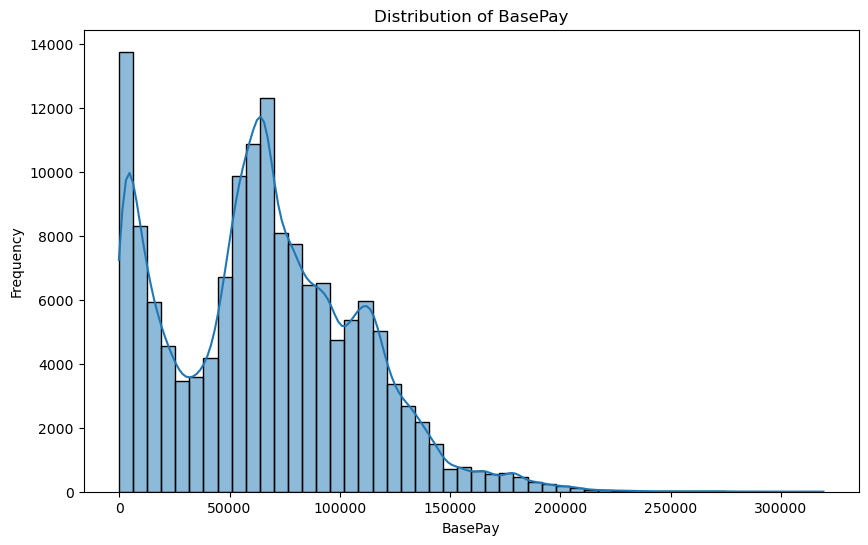

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BasePay'].dropna(), bins=50, kde=True)
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Average TotalPay per Year

In [7]:
df[['TotalPay', 'Year']].groupby('Year').mean()

,TotalPay
Year,
2011,71744.103871
2012,74113.262265
2013,77611.443142
2014,75463.918140


<Axes: xlabel='Year'>

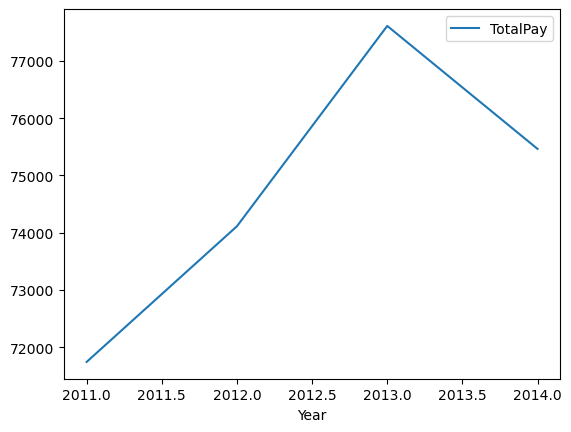

In [9]:
df[['TotalPay', 'Year']].groupby('Year').mean().plot()

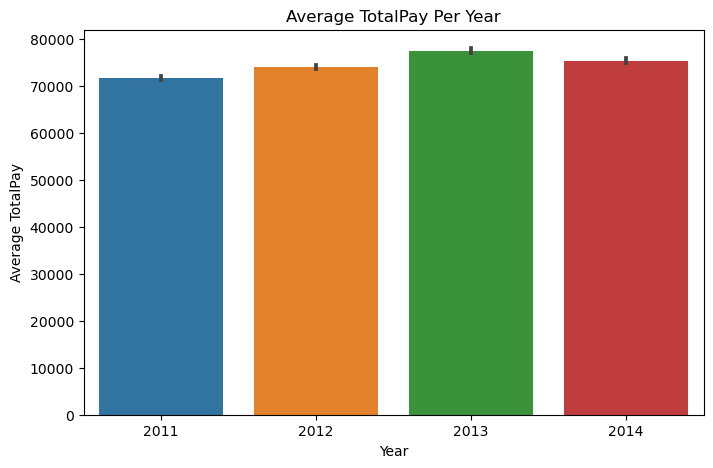

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='TotalPay', data=df, estimator='mean')
plt.title('Average TotalPay Per Year')
plt.ylabel('Average TotalPay')
plt.show()


In [ ]:
# Top 10 Most Common Job Titles

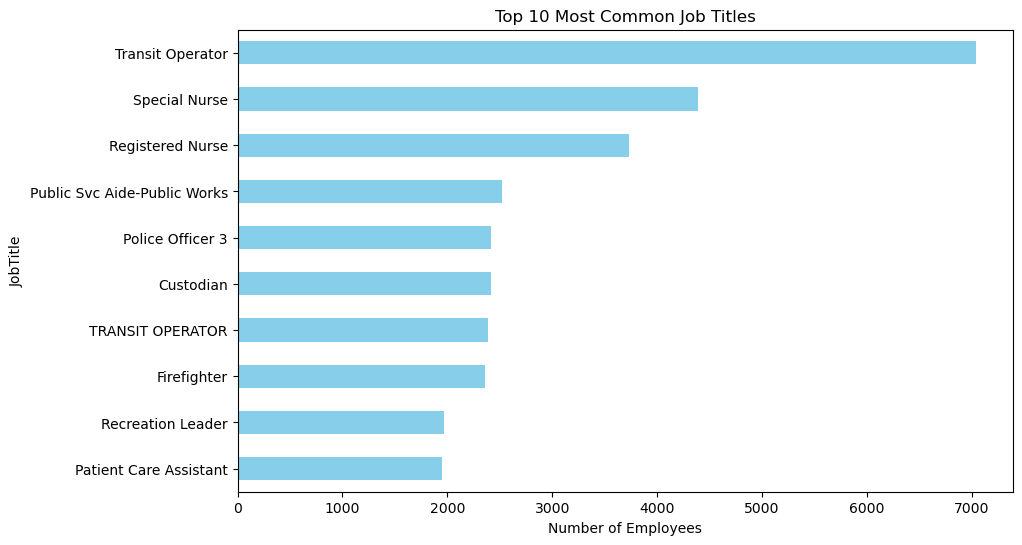

In [12]:
top_jobs = df['JobTitle'].value_counts().head(10)
top_jobs.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Employees')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Top 10 Highest Paid Employees

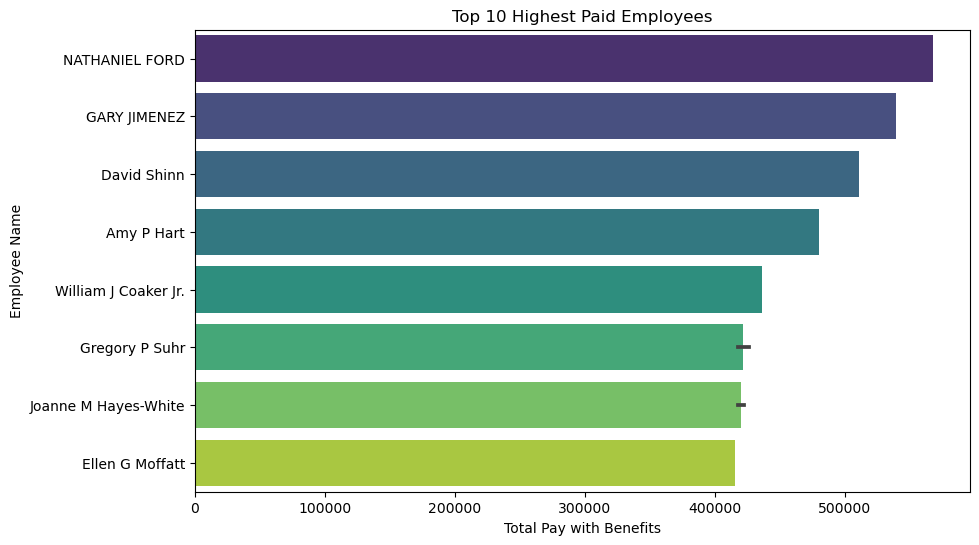

In [13]:
top_paid = df[['EmployeeName', 'TotalPayBenefits']].sort_values(by='TotalPayBenefits', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPayBenefits', y='EmployeeName', data=top_paid, palette='viridis')
plt.title('Top 10 Highest Paid Employees')
plt.xlabel('Total Pay with Benefits')
plt.ylabel('Employee Name')
plt.show()


In [ ]:
# Boxplot of BasePay by Year

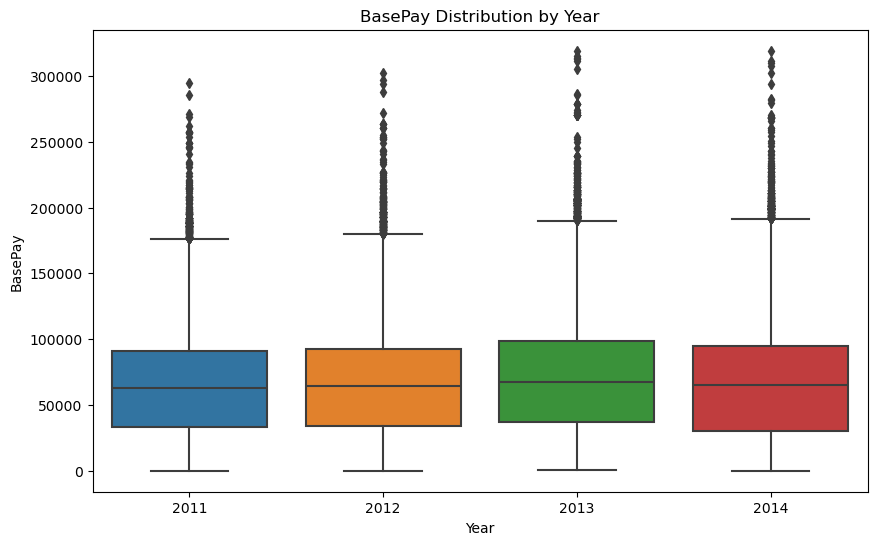

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='BasePay', data=df)
plt.title('BasePay Distribution by Year')
plt.show()


In [ ]:
# Correlation Heatmap

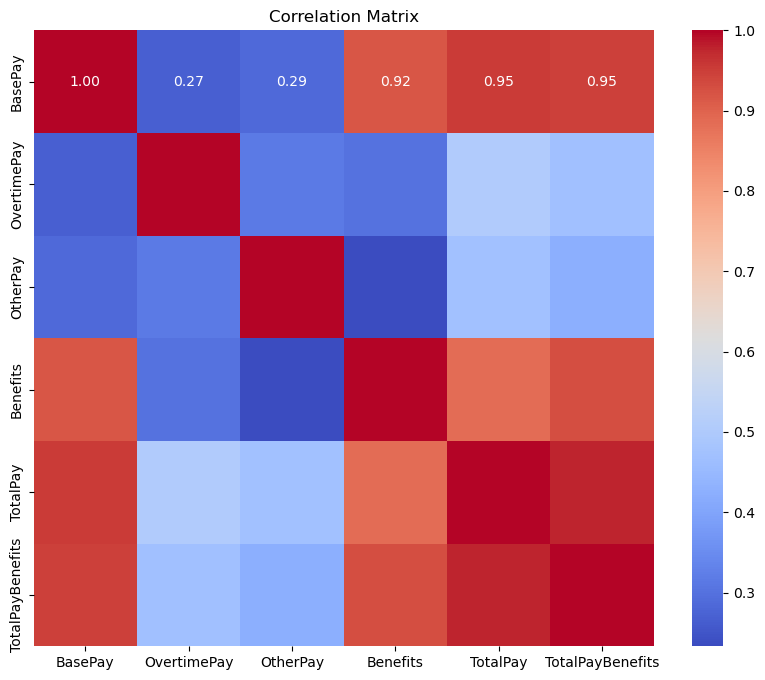

In [15]:
plt.figure(figsize=(10, 8))
corr = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Trend of Average OvertimePay Over Years

c:\Users\mindf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mindf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


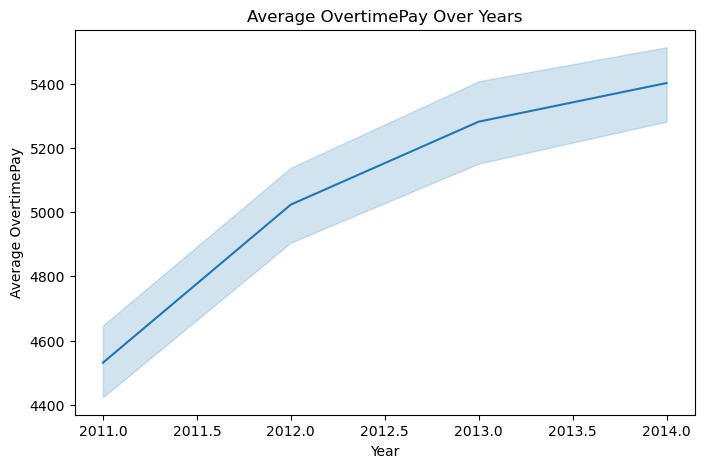

In [16]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='OvertimePay', data=df, estimator='mean')
plt.title('Average OvertimePay Over Years')
plt.ylabel('Average OvertimePay')
plt.show()


In [ ]:
#  Top 5 Agencies with Most Employees

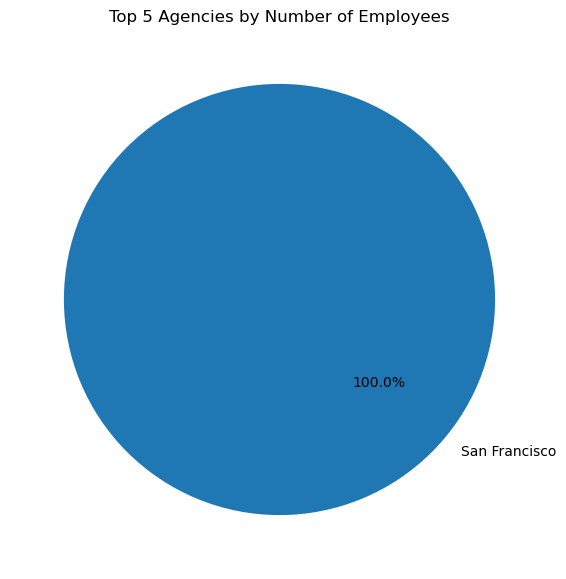

In [17]:
top_agencies = df['Agency'].value_counts().head(5)
top_agencies.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=140)
plt.title('Top 5 Agencies by Number of Employees')
plt.ylabel('')
plt.show()


In [ ]:
# Compare TotalPay and TotalPayBenefits for Top 10 Job Titles

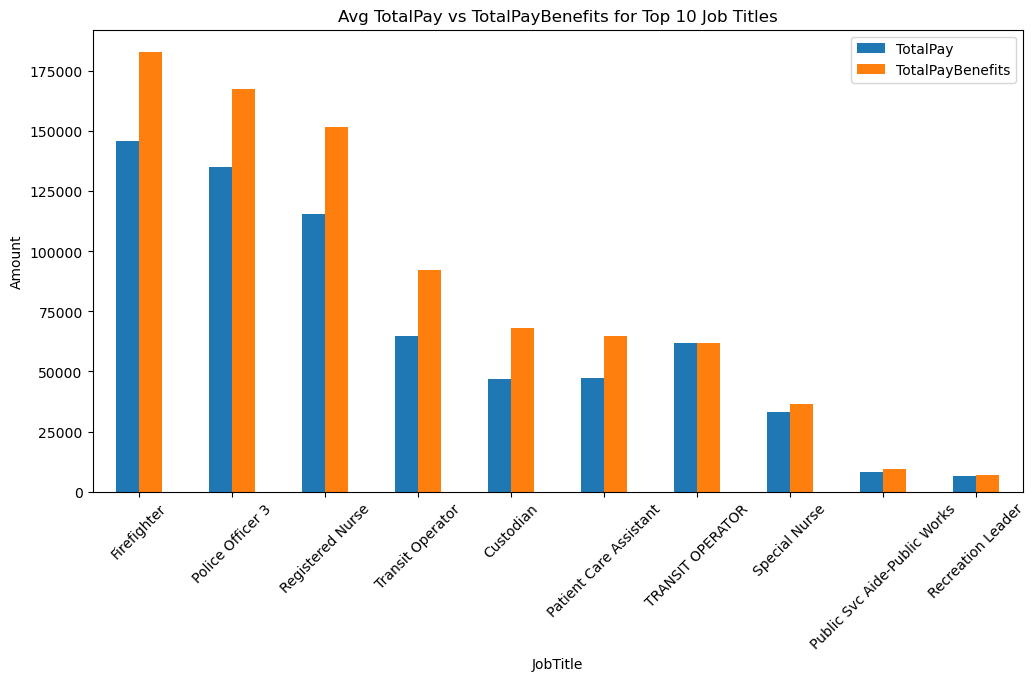

In [18]:
top_titles = df['JobTitle'].value_counts().head(10).index
filtered = df[df['JobTitle'].isin(top_titles)]
grouped = filtered.groupby('JobTitle')[['TotalPay', 'TotalPayBenefits']].mean().sort_values(by='TotalPayBenefits', ascending=False)

grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Avg TotalPay vs TotalPayBenefits for Top 10 Job Titles')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


In [ ]:
### Violin Plot of TotalPay by Year

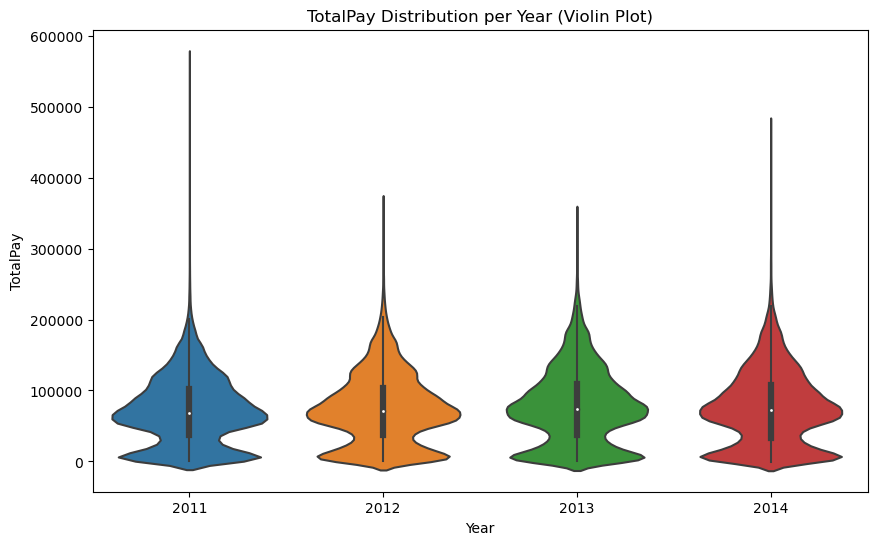

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='TotalPay', data=df)
plt.title('TotalPay Distribution per Year (Violin Plot)')
plt.show()


In [ ]:
# Create a Histogram of OvertimePay

In [ ]:
# Compare Average BasePay Across Years

In [ ]:
# Plot a Boxplot of TotalPay by Year

In [ ]:
# Job Title Frequency Barplot

In [ ]:
# Correlation Heatmap for Numerical Columns

In [ ]:
# Median salary year wise

In [ ]:
# Come up with a way to categorise the salaries based on job titles and plot a salary distribution pie chart

In [ ]:
# Histogram of BasePay vs JobTitles